# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Aanchal Gupta
#### Github repo : https://github.com/aanchalgt/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content from the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract the article content (assuming the main article is in <article> tag)
    article = soup.find('article')
    
    # Serialize the article HTML content to a .pkl file
    with open('article.pkl', 'wb') as f:
        pickle.dump(article.prettify(), f)
    print("Article HTML saved to article.pkl")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Article HTML saved to article.pkl


### Question 2:


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
import pickle
from bs4 import BeautifulSoup

# Load the article HTML from the .pkl file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Extract and print the text from the article
article_text = soup.get_text()
print(article_text)





   How Laser Headlights Work
  




    130 Comments
   


     by:
    


      Lewin Day
     







     March 22, 2021
    
























   When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
  

   Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
  





   Laser Headlights?!
  



     BWM’s prototype laser headlight assemblies undergoing testing.
    


   The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviou

### Question 3:


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Load the article HTML from the .pkl file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Extract the text from the article
article_text = soup.get_text()

# Load the pre-trained spaCy model (en_core_web_sm is a small model, you can also use a larger model like en_core_web_md or en_core_web_lg)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and convert tokens to lower case
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Calculate the frequency of each token using Counter
token_freq = Counter(filtered_tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the common tokens with their labels and frequencies
print("Common tokens (with frequency):")
for token, freq in most_common_tokens:
    print(f"Token: '{token}' | Frequency: {freq}")


Common tokens (with frequency):
Token: 'laser' | Frequency: 35
Token: 'headlights' | Frequency: 19
Token: 'headlight' | Frequency: 11
Token: 'technology' | Frequency: 10
Token: 'led' | Frequency: 10


### Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Load the article HTML from the .pkl file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Extract the text from the article
article_text = soup.get_text()

# Load the pre-trained spaCy model (en_core_web_sm is a small model)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and use the lemma of each token (convert to lower case)
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Calculate the frequency of each lemma using Counter
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the common lemmas with their frequencies
print("Common lemmas (with frequency):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' | Frequency: {freq}")


Common lemmas (with frequency):
Lemma: 'laser' | Frequency: 40
Lemma: 'headlight' | Frequency: 28
Lemma: 'beam' | Frequency: 12
Lemma: 'technology' | Frequency: 10
Lemma: 'led' | Frequency: 10


### Question 5: 

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence and convert each token to lowercase
    tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_space]
    # Count how many interesting tokens appear in the sentence
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    # Return the ratio of interesting tokens to total tokens
    return interesting_count / len(tokens) if len(tokens) > 0 else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence and get lemmatized tokens (convert to lowercase)
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_space]
    # Count how many interesting lemmas appear in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    # Return the ratio of interesting lemmas to total lemmas
    return interesting_count / len(lemmas) if len(lemmas) > 0 else 0



import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Example sentence (can be the first sentence from the article)
sentence = nlp("Laser headlights are a new technology used in cars.")

# Frequent tokens and lemmas from question 3
interesting_tokens = ['laser', 'headlight', 'work', 'technology', 'light']
interesting_lemmas = ['laser', 'headlight', 'work', 'technology', 'light']

# Get the score for the sentence based on tokens and lemmas
token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")


Token Score: 0.2222222222222222
Lemma Score: 0.3333333333333333


### Question 6:

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

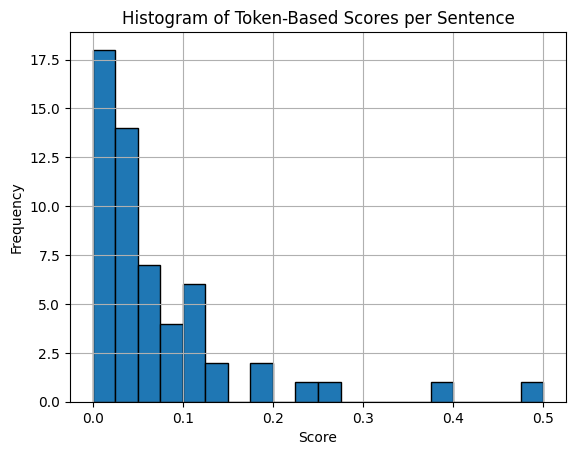

Token scores for each sentence: [0.09090909090909091, 0.0, 0.0, 0.0, 0.1, 0.5, 0.25, 0.08695652173913043, 0.047619047619047616, 0.14285714285714285, 0.1875, 0.0, 0.045454545454545456, 0.1111111111111111, 0.045454545454545456, 0.1875, 0.1, 0.09090909090909091, 0.038461538461538464, 0.0, 0.0, 0.045454545454545456, 0.03773584905660377, 0.0, 0.03333333333333333, 0.23529411764705882, 0.05555555555555555, 0.0, 0.047619047619047616, 0.06060606060606061, 0.05263157894736842, 0.0, 0.06451612903225806, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.02857142857142857, 0.0, 0.0, 0.0, 0.125, 0.12195121951219512, 0.03225806451612903, 0.0, 0.1111111111111111, 0.1111111111111111, 0.04, 0.04, 0.030303030303030304, 0.08695652173913043, 0.07407407407407407, 0.041666666666666664, 0.0, 0.375]


In [6]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Load the article HTML from the .pkl file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Extract the text from the article
article_text = soup.get_text()

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Frequent tokens from question 3 (example)
interesting_tokens = ['laser', 'headlight', 'work', 'technology', 'light']

# Function to calculate score for a sentence based on tokens
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_space]
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens) if len(tokens) > 0 else 0

# List to hold the scores for each sentence
scores = []

# Loop through each sentence in the article
for sentence in doc.sents:
    score = score_sentence_by_token(sentence, interesting_tokens)
    scores.append(score)

# Plot the histogram of the scores
plt.hist(scores, bins=20, edgecolor='black')
plt.title('Histogram of Token-Based Scores per Sentence')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Token scores for each sentence
print(f"Token scores for each sentence: {scores}")

# The most common range of scores seems to be from 0 to 0.2.

### Question 7:

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

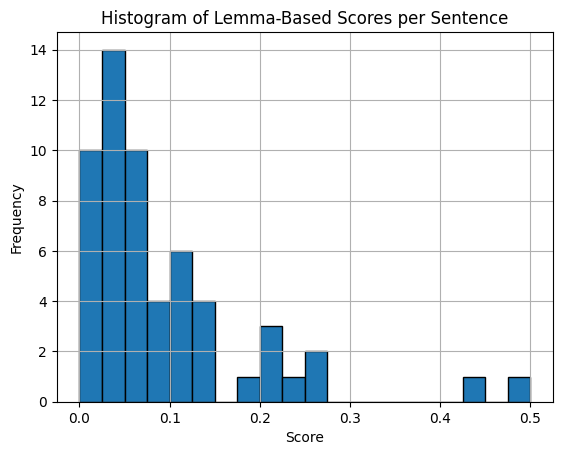

In [7]:
import spacy
import matplotlib.pyplot as plt
import pickle
from bs4 import BeautifulSoup

# Load the article HTML from the .pkl file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Extract the text from the article
article_text = soup.get_text()

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Frequent lemmas from question 4 (example)
interesting_lemmas = ['laser', 'headlight', 'work', 'technology', 'light']

# Function to calculate score for a sentence based on lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_space]
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return interesting_count / len(lemmas) if len(lemmas) > 0 else 0

# List to hold the scores for each sentence
lemma_scores = []

# Loop through each sentence in the article
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence, interesting_lemmas)
    lemma_scores.append(score)

# Plot the histogram of the lemma scores
plt.hist(lemma_scores, bins=20, edgecolor='black')
plt.title('Histogram of Lemma-Based Scores per Sentence')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The most common range of scores seems to be from 0 to 0.15.


### Question 8: 

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only wanted to consider nouns as interesting words, the following tokens and lemmas would be omitted from the lists in questions 3 and 4:

Tokens:

Adjectives (e.g., "beautiful", "new")
Verbs (e.g., "run", "work")
Adverbs (e.g., "quickly", "rarely")
Pronouns (e.g., "he", "they")
Prepositions (e.g., "in", "on")
Conjunctions (e.g., "and", "but")
Lemmas:

Any lemmas derived from the above parts of speech (e.g., "run" -> "run", "beautiful" -> "beautiful").
How to change the code to only consider nouns:
In both score_sentence_by_token and score_sentence_by_lemma, filter the tokens and lemmas to only include nouns:
For tokens: Add a condition to check if token.pos_ is 'NOUN' or 'PROPN' (Proper Nouns).
For lemmas: Similarly, use token.pos_ to filter and only include lemmas for nouns.

In [8]:
# Convert to HTML
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 384575 bytes to web-scraping.html
